In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sine 파형 데이터 생성
def create_sine_wave_data(seq_length, num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        start = np.random.rand()
        x = np.linspace(start, start + 2 * np.pi, seq_length)
        X.append(np.sin(x))
        y.append(np.sin(x + 0.1))
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = create_sine_wave_data(seq_length, num_samples)

# 데이터셋을 PyTorch 텐서로 변환
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

In [4]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size)  # 초기 은닉 상태
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # 마지막 시간 단계의 출력
        return out

input_size = 1
hidden_size = 32
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

In [5]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size)  # 초기 은닉 상태
        c0 = torch.zeros(1, x.size(0), hidden_size)  # 초기 셀 상태
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시간 단계의 출력
        return out

model = SimpleLSTM(input_size, hidden_size, output_size)

In [13]:
# 손실 함수와 최적화 알고리즘 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Finished Training')

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

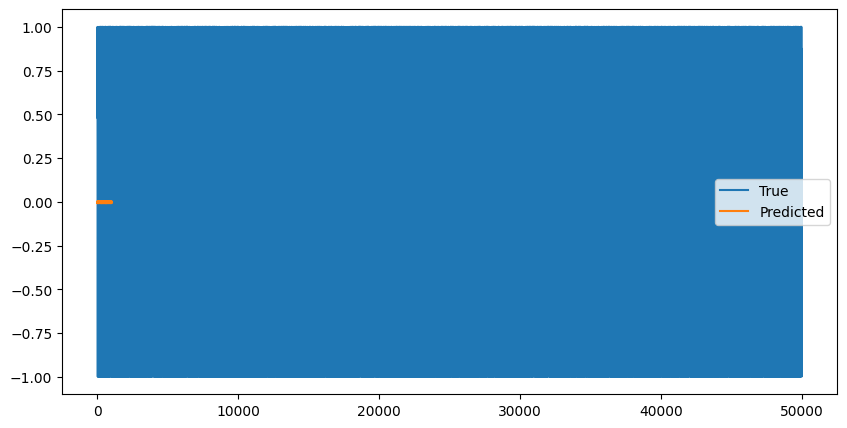

In [5]:
# 모델 평가
model.eval()
with torch.no_grad():
    predicted = model(X).detach().numpy()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(y.numpy().flatten(), label='True')
plt.plot(predicted.flatten(), label='Predicted')
plt.legend()
plt.show()